# Explain the mathematical intuition behind the following optimizers

# (SGD+ Momentum)

SGD with Momentum is one of the optimizers which is used to improve the performance of the neural network.

Let's take an example and understand the intuition behind the optimizer suppose we have a ball which is sliding from the start of the slope as it goes the speed of the bowl is increased over time. If we have one point A and we want to reach point B and we don't know in which direction to move but we ask for the 4 points which have already reached point B. If all 4 points are pointing you in the same direction then the confidence of the A is more and it goes in the direction pointed very fast. This is the main concept behind the SGD with Momentum.'

change_x(t) = step_size * f'(x(t-1)) + momentum * change_x(t-1)



The update to the position is then performed as before.

# x(t) = x(t-1) – change_x(t)

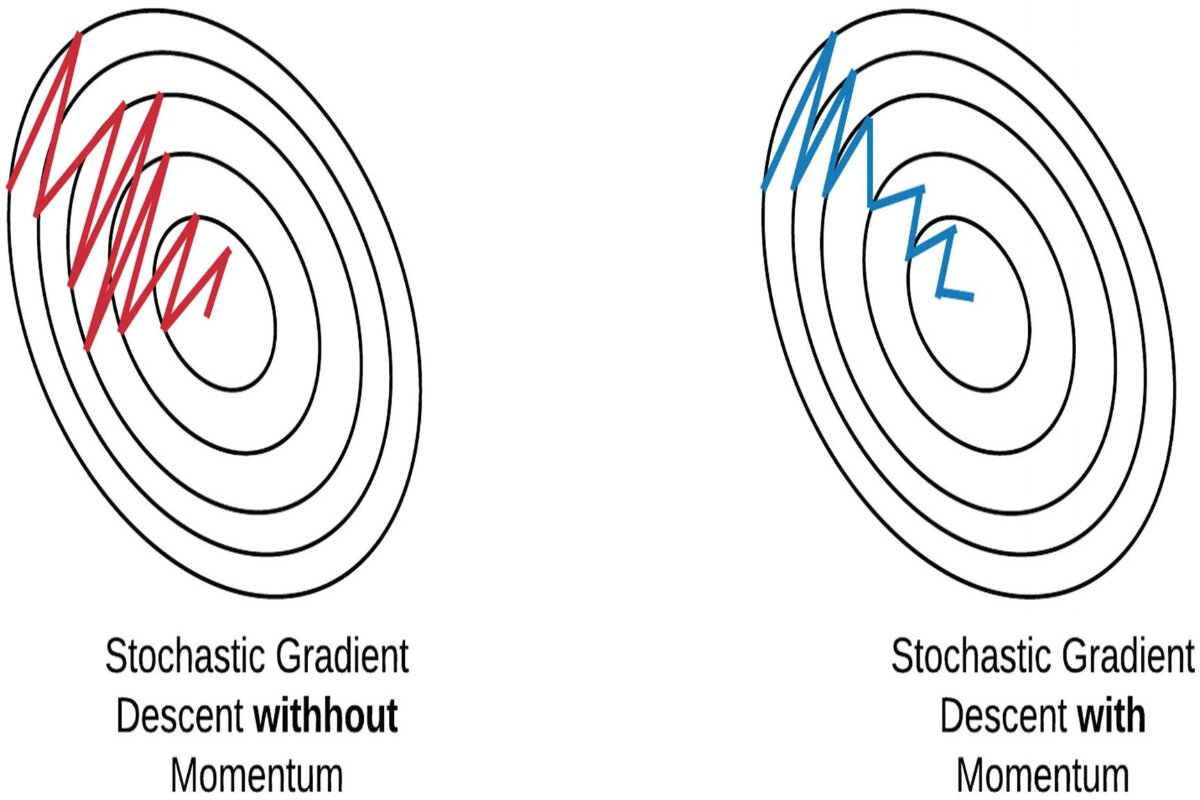

# Gradient Descent With AdaGrad




The Adaptive Gradient algorithm, or AdaGrad for short, is an extension to the gradient descent optimization algorithm.

---
The parameters with the largest partial derivative of the loss have a correspondingly rapid decrease in their learning rate, while parameters with small partial derivatives have a relatively small decrease in their learning rate.


---

A problem with the gradient descent algorithm is that the step size (learning rate) is the same for each variable or dimension in the search space. It is possible that better performance can be achieved using a step size that is tailored to each variable, allowing larger movements in dimensions with a consistently steep gradient and smaller movements in dimensions with less steep gradients



---
cust_step_size = step_size / (1e-8 + sqrt(s))
Where cust_step_size is the calculated step size for an input variable for a given point during the search, step_size is the initial step size, sqrt() is the square root operation, and s is the sum of the squared partial derivatives for the input variable seen during the search so far.

The custom step size is then used to calculate the value for the variable in the next point or solution in the search.

x(t+1) = x(t) – cust_step_size * f'(x(t))
This process is then repeated for each input variable until a new point in the search space is created and can be evaluated.

Importantly, the partial derivative for the current solution (iteration of the search) is included in the sum of the square root of partial derivatives.





# RMSProp






Root Mean Squared Propagation, or RMSProp, is an extension of gradient descent and the AdaGrad version of gradient descent that uses a decaying average of partial gradients in the adaptation of the step size for each parameter.



---
RMSProp can be thought of as an extension of AdaGrad in that it uses a decaying average or moving average of the partial derivatives instead of the sum in the calculation of the learning rate for each parameter.

This is achieved by adding a new hyperparameter we will call rho that acts like momentum for the partial derivatives.


---


The calculation of the mean squared partial derivative for one parameter is as follows:

s(t+1) = (s(t) * rho) + (f'(x(t))^2 * (1.0-rho))
Where s(t+1) is the decaying moving average of the squared partial derivative for one parameter for the current iteration of the algorithm, s(t) is the decaying moving average squared partial derivative for the previous iteration, f'(x(t))^2 is the squared partial derivative for the current parameter, and rho is a hyperparameter, typically with the value of 0.9 like momentum.



---

Given that we are using a decaying average of the partial derivatives and calculating the square root of this average gives the technique its name, e.g, square root of the mean squared partial derivatives or root mean square (RMS). For example, the custom step size for a parameter may be written as:

cust_step_size(t+1) = step_size / (1e-8 + RMS(s(t+1)))
Once we have the custom step size for the parameter, we can update the parameter using the custom step size and the partial derivative f'(x(t)).

x(t+1) = x(t) – cust_step_size(t+1) * f'(x(t))
This process is then repeated for each input variable until a new point in the search space is created and can be evaluated.






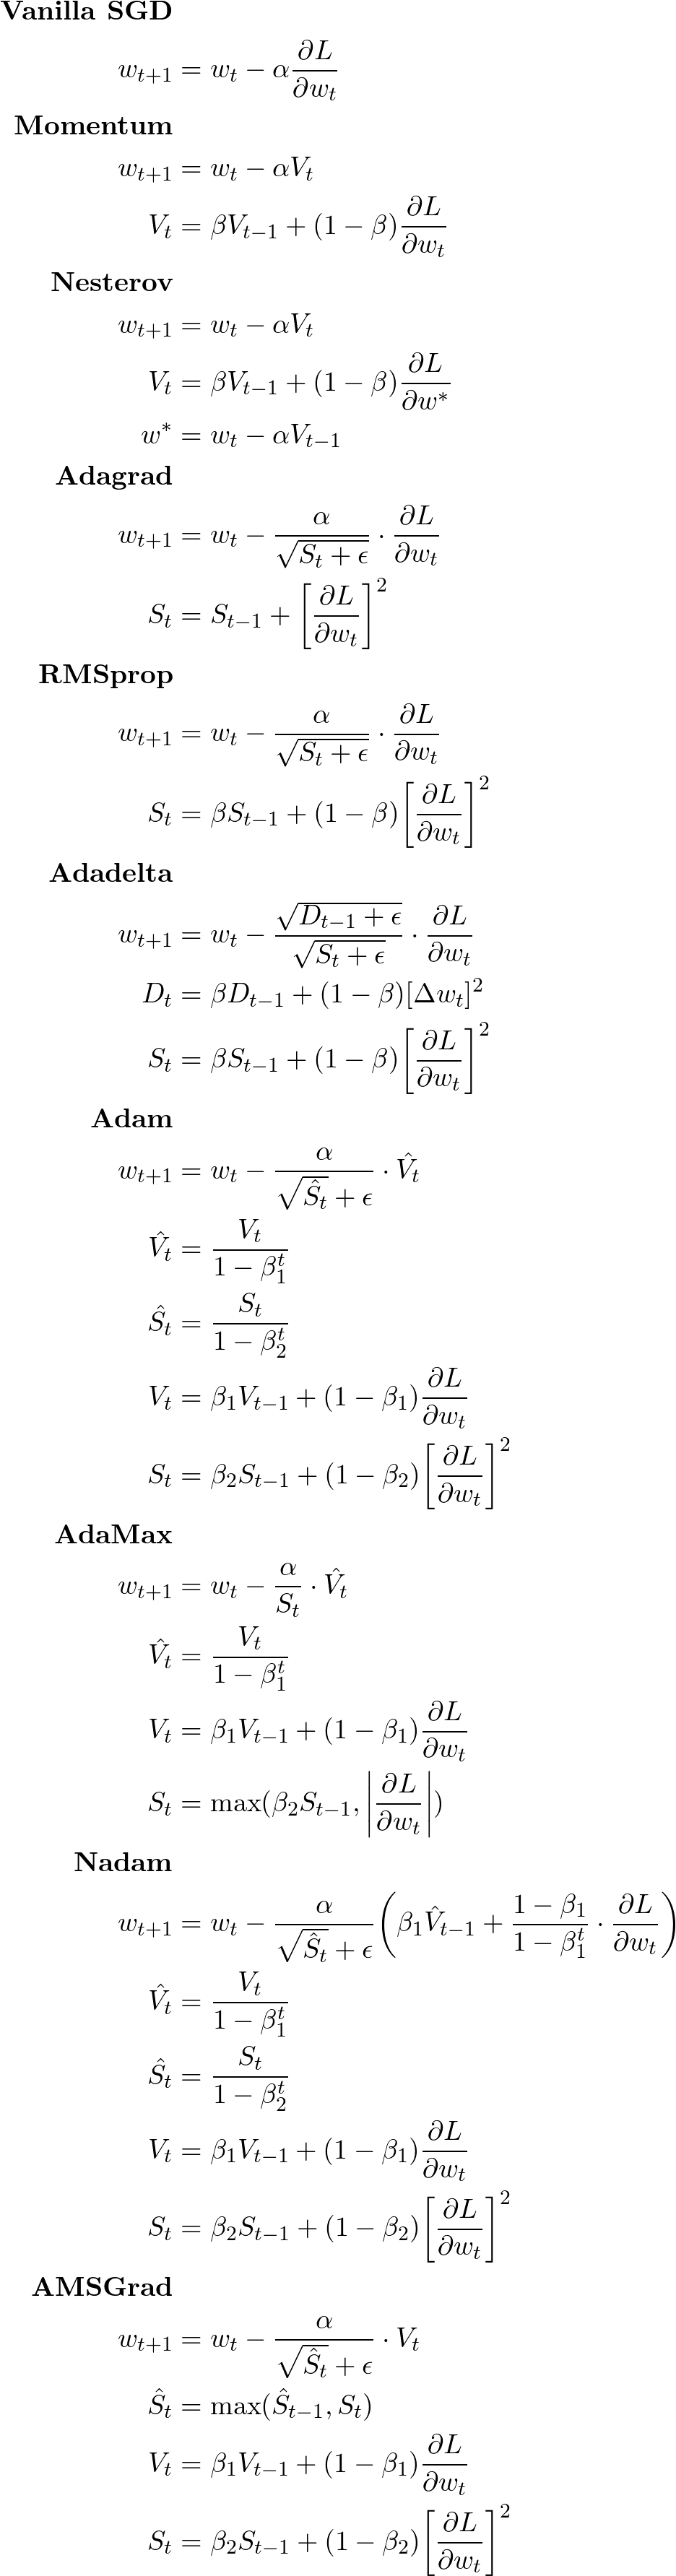

In [1]:
from IPython.display import Image
Image(url='https://media.licdn.com/dms/image/D4E12AQHhJnO3m79VYQ/article-inline_image-shrink_1500_2232/0/1694349762034?e=1718841600&v=beta&t=s44KzaSITz-0Jtt6EJGA6WT1p3cKix1ohizeDB42hzM')


# Explore the literature and find out which of the above optimizers are preferred in real-
world applications. In doing so, you should compare the performance of the above

optimizers and address the advantages and disadvantages of each when training neural
networks.


Introduction
- Neural networks are powerful machine learning models that require careful optimization of their parameters during training.
- Today, we'll explore three popular optimizers - SGD + Momentum, Adagrad, and RMSprop - and compare their performance in real-world applications.

Stochastic Gradient Descent with Momentum (SGD + Momentum)
- SGD + Momentum is one of the most widely used optimizers in deep learning.
- Advantages:
  - Faster convergence than basic SGD by incorporating a momentum term.
  - Better ability to escape saddle points and local minima.
  - Relatively simple to implement and tune.
- Disadvantages:
  - Hyperparameter tuning (learning rate and momentum) can be challenging.
  - Sensitive to the scale of the gradients, which can lead to poor performance on problems with different feature scales.

Adagrad
- Adagrad is an adaptive learning rate optimization algorithm that adjusts the learning rate for each parameter based on the historical gradients.
- Advantages:
  - Automatically adapts the learning rate for each parameter, making it more robust to the scale of the gradients.
  - Performs well on sparse data, as it accumulates larger updates for infrequent parameters.
  - Can converge faster than SGD, especially for problems with sparse(thinly distributed
   ) gradients.
- Disadvantages:
  - The learning rate monotonically decreases, which can lead to very small learning rates and slow convergence in the later stages of training.
  - May not perform as well on problems with dense gradients.

RMSprop
- RMSprop is another adaptive learning rate optimization algorithm that maintains a moving average of the squared gradients.
- Advantages:
  - Adapts the learning rate for each parameter based on the magnitudes of the recent gradients, making it more robust to the scale of the gradients.
  - Performs well on a variety of problems, including those with dense gradients, and is often a good default choice.
  - Can converge faster than SGD, especially for problems with high curvature or ill-conditioned gradients.
- Disadvantages:
  - Hyperparameter tuning (learning rate and decay rate for the moving average) can be necessary for optimal performance.
  - The performance can be sensitive to the choice of hyperparameters, and it may not perform as well as Adagrad on sparse data.

Conclusion
- In real-world applications, all three optimizers have been widely used and have shown promising results.
- The choice of optimizer often depends on the specific problem, the network architecture, and the characteristics of the data.
- SGD + Momentum is a reliable and versatile optimizer, Adagrad can be effective for sparse data, and RMSprop is a good all-around choice.
- Ultimately, experimenting with multiple optimizers and comparing their performance on the specific problem is often the best approach.

#SMOTE

SMOTE stands for Synthetic Minority Over-sampling Technique. It’s a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This is done by:

Finding the k-nearest-neighbors for minority class observations (finding similar instances)
Randomly choosing one of the k-nearest-neighbors and using it to create a similar, but randomly tweaked, new observation.

Mathematically, the synthetic instance is created as follows:
Given two instances


                         a=(a1​,a2​,...,an​)

 and



                         b=(b1​,b2​,...,bn​)



the new instance


                                c=(c1​,c2​,...,cn​)


 is created where:


                         ci​=ai​+rand(0,1)∗(bi​−ai​)






In [2]:
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples=5000, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)
X_test = scaler.transform(X_test)

train_dataset = tf.data.Dataset.from_tensor_slices((X_res, y_res))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_dataset.batch(32), epochs=10)

print("Model performance:")
model.evaluate(test_dataset.batch(32))


Epoch 1/10
248/248 [==============================] - 3s 4ms/step - loss: 0.2655 - accuracy: 0.8980
Epoch 2/10
248/248 [==============================] - 1s 4ms/step - loss: 0.1726 - accuracy: 0.9439
Epoch 3/10
248/248 [==============================] - 1s 5ms/step - loss: 0.1526 - accuracy: 0.9509
Epoch 4/10
248/248 [==============================] - 1s 5ms/step - loss: 0.1380 - accuracy: 0.9566
Epoch 5/10
248/248 [==============================] - 1s 6ms/step - loss: 0.1271 - accuracy: 0.9618
Epoch 6/10
248/248 [==============================] - 2s 6ms/step - loss: 0.1176 - accuracy: 0.9656
Epoch 7/10
248/248 [==============================] - 1s 5ms/step - loss: 0.1090 - accuracy: 0.9690
Epoch 8/10
248/248 [==============================] - 1s 5ms/step - loss: 0.1013 - accuracy: 0.9710
Epoch 9/10
248/248 [==============================] - 1s 6ms/step - loss: 0.0945 - accuracy: 0.9726
Epoch 10/10
248/248 [==============================] - 1s 4ms/step - loss: 0.0884 - accuracy: 0.9743

[0.22963005304336548, 0.9179999828338623]

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Count the number of instances in each class before and after SMOTE
unique, counts = np.unique(y, return_counts=True)
counts_before = dict(zip(unique, counts))
unique, counts = np.unique(y_res, return_counts=True)
counts_after = dict(zip(unique, counts))

# Plot the class distribution before SMOTE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(counts_before.keys(), counts_before.values(), color=['blue', 'orange'])
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

# Plot the class distribution after SMOTE
plt.subplot(1, 2, 2)
plt.bar(counts_after.keys(), counts_after.values(), color=['blue', 'orange'])
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)
X_res_vis = pca.transform(X_res)

plt.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
plt.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')

plt.scatter(X_res_vis[y_res == 0, 0], X_res_vis[y_res == 0, 1], label="Class #0 SMOTE", alpha=0.5, linewidth=0.15)
plt.scatter(X_res_vis[y_res == 1, 0], X_res_vis[y_res == 1, 1], label="Class #1 SMOTE", alpha=0.5, linewidth=0.15, c='r')

plt.legend()
plt.show()


